In [1]:
from xcube.core.store.store import find_data_store_extensions
from xcube.core.store.store import get_data_store_params_schema
from xcube.core.store.store import new_data_store
from IPython.display import JSON

Which data accessors are available?

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available?

In [3]:
get_data_store_params_schema('sentinelhub')

Just provide mandatory parameters to instantiate the store class:

In [4]:
store = new_data_store('sentinelhub')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [5]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Which in-memory data types are provided?

- `dataset` --> `xarray.Dataset` (Gridded data)
- `mldataset` -->  `xcube.core.mlds.MultiLevelDataset`  (Gridded data, multi-resolution pyramid)
- `geodataframe` --> `geopandas.GeoDataFrame` (Vector data) 


In [6]:
store.get_type_ids()

('dataset',)

Get more info about a dedicated dataset. This include a description of the possible open formats:

In [7]:
store.describe_data('S2L2A')

Which parameters must I pass or are available to open the dataset?

In [8]:
store.get_open_data_params_schema('S2L2A')

There are 4 required parameters, so we need to provide them to open a dataset:

In [9]:
dataset = store.open_data('S2L2A', band_names=['B01', 'B05', 'B08'], geometry=[11, 52, 14, 55], spatial_res=0.005, time_range=['2019-05-01', '2019-05-10'], time_period='1d')
dataset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 600, lon: 600, time: 10)
Coordinates:
  * lat        (lat) float64 55.0 54.99 54.99 54.98 ... 52.02 52.01 52.01 52.0
  * lon        (lon) float64 11.0 11.01 11.01 11.02 ... 13.98 13.99 13.99 14.0
  * time       (time) datetime64[ns] 2019-05-01T12:00:00 ... 2019-05-10T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B01        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L2A Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2020-06-16T15:11:48.290335
    processing_level:          L2A
    time_coverage_start:       2019-05-01T00:00:00+00:00
    time_coverage_end:         2019-05-11T00:00:00+00:00
    time_coverage_duration:    P10DT0H0M0S
    time_coverage_resolution:  P1DT0H0M0S
    geospatial_lon_min:        11
    geospatial_lat_min:        52
    geospatial_lon_max:        14.0
    geospatial_lat_max:        55.0

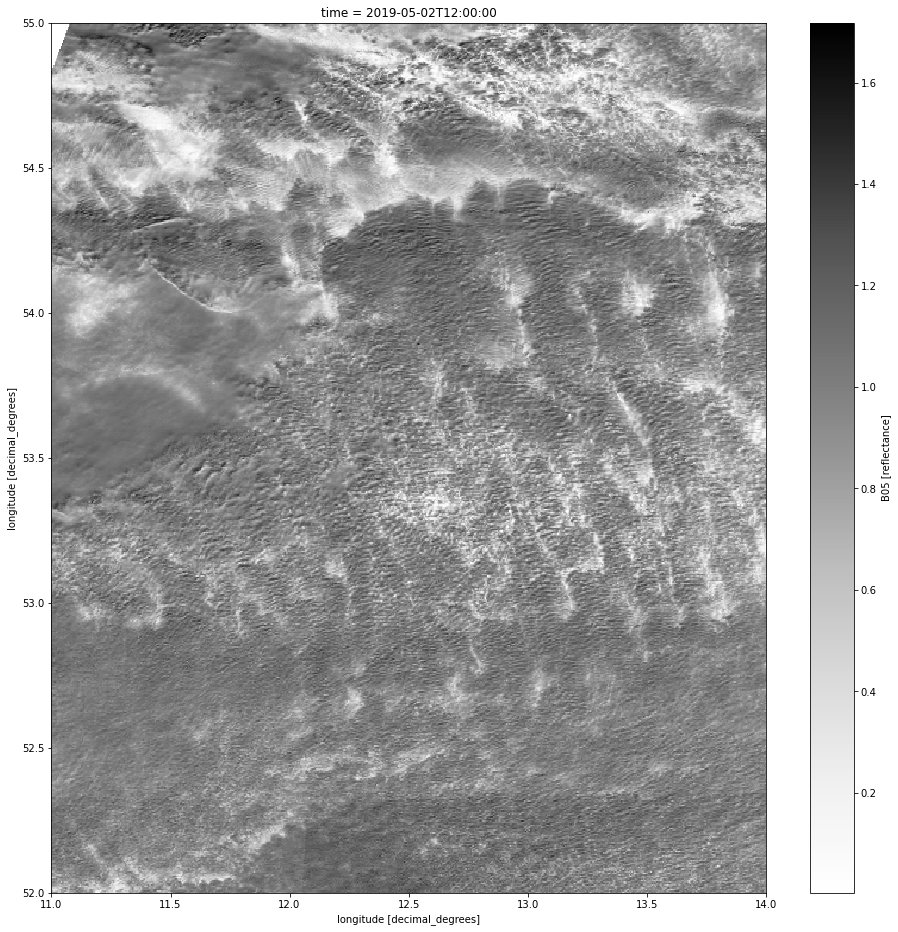

In [15]:
dataset.B05.isel(time=1).plot.imshow(cmap='Greys', figsize=(16, 16))